Question #1:

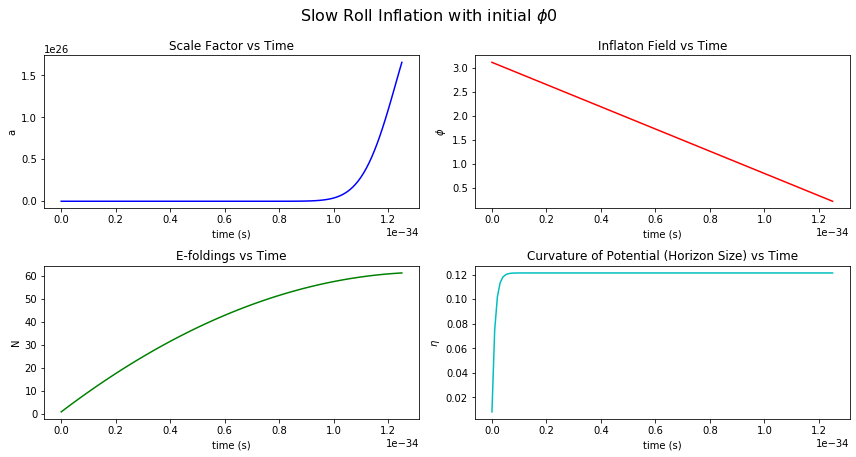

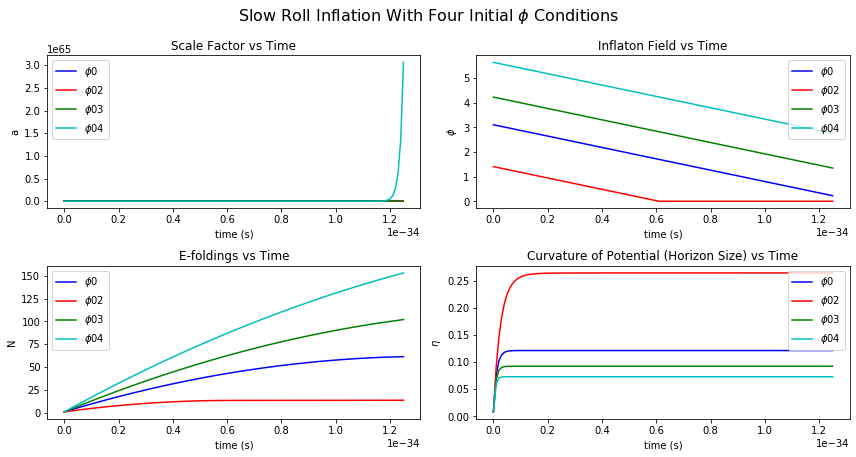

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def slowroll(t, y, *P):
    
    
    # unpack the parameters from the array P
    m = P

    a = y[0]
    phi = y[1]
    N = y[2]
    eta = y[3]
    
    # slow roll system
    dadt = a*np.sqrt((8*np.pi/3)*m[0]**2*phi**2)
    dphidt = -((2/3)*m[0]*phi)/np.sqrt((8*np.pi/3)*phi**2)
    dNdt = np.sqrt((8*np.pi/3)*m[0]**2*phi**2)
    detadt = 1/a

    
    # return an array of derivatives with same order as input vector
    return np.array([ dadt, dphidt, dNdt, detadt ])

def RK4(t, y, h, slowroll, *P):
    # Implements a single step of a fourth-order, explicit Runge-Kutta scheme
    thalf = t + 0.5*h
    k1 = h * slowroll(t, y, *P)
    k2 = h * slowroll(thalf, y + 0.5*k1, *P)
    k3 = h * slowroll(thalf, y + 0.5*k2, *P)
    k4 = h * slowroll(t + h, y + k3, *P)
    return y + (k1 + 2*k2 + 2*k3 + k4)/6

def odeSolve(t0, y0, tmax, h, slowroll, method, *P):
    #ODE driver with constant step-size, allowing systems of ODE's
    # make array of times and find length of array
    t = np.arange(t0,tmax+h,h)
    ntimes,  = t.shape

    # find out if we are solving a scalar ODE or a system of ODEs, and allocate space
    
    if type(y0) in [int, float]:  # check if primitive type
        neqn = 1
        y = np.zeros( ntimes )
    else:                         # otherwise assume a numpy array
        neqn, = y0.shape
        y = np.zeros( (ntimes, neqn) )

    # set first element of solution to initial conditions
    y[0] = y0

    for i in range(0,ntimes-1):
        y[i+1] = method(t[i], y[i], h, slowroll, *P)

    return t,y

#input conditions
h = .1
t0 = 0.0
tmax = 12.5
a0 = 1
m = 1
phi_crit=1/np.sqrt(4*np.pi)
phi0 = 11.024*phi_crit
phi02 = 5*phi_crit
phi03 = 15*phi_crit
phi04 = 20*phi_crit
N0 = 1
eta0 = 1/(4*np.pi*phi0**2)
y0 = np.array([a0, phi0, N0, eta0])

# call the solver
t, y = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
#solve for other initial inflaton conditions
y0 = np.array([a0, phi02, N0, eta0])
t, y2 = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
y0 = np.array([a0, phi03, N0, eta0])
t, y3 = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
y0 = np.array([a0, phi04, N0, eta0])
t, y4 = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
#Input dimensionless parameters
tp = 10**(35)
t = t/tp
eta = y[3]/eta0

#plots with phi0 as initial condition for phi
fig = plt.figure(figsize=(12,6))
fig.suptitle('Slow Roll Inflation with initial $\phi0$', size=16, y=1.05)
ax1 = plt.subplot(221)    
ax2 = plt.subplot(222)         
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
#a vs t
ax1.plot(t, y[:,0],'b')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('a')
ax1.set_title('Scale Factor vs Time')
#phi vs t
ax2.plot(t,y[:,1],'r', label='phi')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('$\phi$')
ax2.set_title('Inflaton Field vs Time')
#N vs t
ax3.plot(t,y[:,2],'g', label='N')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('N')
ax3.set_title('E-foldings vs Time')
#eta vs t
ax4.plot(t,y[:,3],'c', label='eta')
ax4.set_xlabel('time (s)')
ax4.set_ylabel('$\eta$')
ax4.set_title('Curvature of Potential (Horizon Size) vs Time')
plt.tight_layout()
plt.show()

#plots with all four initial phi conditions
fig = plt.figure(figsize=(12,6))
fig.suptitle('Slow Roll Inflation With Four Initial $\phi$ Conditions', size=16, y=1.05)
ax1 = plt.subplot(221)    
ax2 = plt.subplot(222)         
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

#a vs t
ax1.plot(t, y[:,0],'b', label='$\phi0$')
ax1.plot(t, y2[:,0],'r', label='$\phi02$')
ax1.plot(t, y3[:,0],'g', label='$\phi03$')
ax1.plot(t, y4[:,0],'c', label='$\phi04$')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('a')
ax1.legend()
ax1.set_title('Scale Factor vs Time')
#phi
ax2.plot(t,y[:,1],'b', label='$\phi0$')
ax2.plot(t,y2[:,1],'r', label='$\phi02$')
ax2.plot(t,y3[:,1],'g', label='$\phi03$')
ax2.plot(t,y4[:,1],'c', label='$\phi04$')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('$\phi$')
ax2.legend()
ax2.set_title('Inflaton Field vs Time')
#N
ax3.plot(t,y[:,2],'b', label='$\phi0$')
ax3.plot(t,y2[:,2],'r', label='$\phi02$')
ax3.plot(t,y3[:,2],'g', label='$\phi03$')
ax3.plot(t,y4[:,2],'c', label='$\phi04$')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('N')
ax3.legend()
ax3.set_title('E-foldings vs Time')
#eta
ax4.plot(t,y[:,3],'b', label='$\phi0$')
ax4.plot(t,y2[:,3],'r', label='$\phi02$')
ax4.plot(t,y3[:,3],'g', label='$\phi03$')
ax4.plot(t,y4[:,3],'c', label='$\phi04$')
ax4.set_xlabel('time (s)')
ax4.set_ylabel('$\eta$')
ax4.legend(loc='upper right')
ax4.set_title('Curvature of Potential (Horizon Size) vs Time')

plt.tight_layout()
plt.show()

a increases exponentially in time, while $\eta$ increases logarithmically

Question #2: We now run the code with other various initial inflaton conditions to see how the initial inflaton condition is related to the number of e-foldings, N.

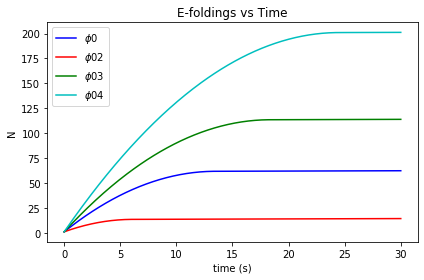

final # of e-foldings for phi0: 62.31428715998713
final # of e-foldings for phi02: 14.296479051629074
final # of e-foldings for phi03: 113.88703026780986
final # of e-foldings for phi04: 201.18343804507728


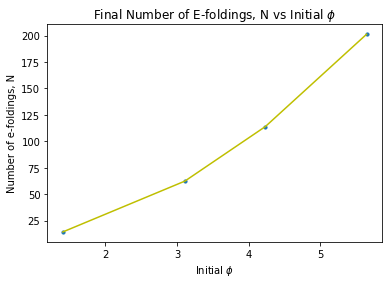

RMSE: 6.091635000687123e-14
SI: 6.221012868367104e-16
R2: 1.0


In [2]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#inital inflaton conditions
phi_crit = 1/np.sqrt(4*np.pi)
phi0 = 11.024*phi_crit
phi02 = 5*phi_crit
phi03 = 15*phi_crit
phi04 = 20*phi_crit

#see how final number of e-foldings, N, relates to initial inflaton conditions
#plots of e-foldings in relation to initial phi conditions

#must have enough time for # of e-foldings to flatten out
tmax=30
y0 = np.array([a0, phi0, N0, eta0])
t, y = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
#solve for other initial inflaton conditions
y0 = np.array([a0, phi02, N0, eta0])
t, y2 = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
y0 = np.array([a0, phi03, N0, eta0])
t, y3 = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
y0 = np.array([a0, phi04, N0, eta0])
t, y4 = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)

plt.plot(t,y[:,2],'b', label='$\phi0$')
plt.plot(t,y2[:,2],'r', label='$\phi02$')
plt.plot(t,y3[:,2],'g', label='$\phi03$')
plt.plot(t,y4[:,2],'c', label='$\phi04$')
plt.xlabel('time (s)')
plt.ylabel('N')
plt.legend()
plt.title('E-foldings vs Time')
plt.tight_layout()
plt.show()

print('final # of e-foldings for phi0:', y[-1,2])
print('final # of e-foldings for phi02:', y2[-1,2])
print('final # of e-foldings for phi03:', y3[-1,2])
print('final # of e-foldings for phi04:', y4[-1,2])

#See the relation between final number of E-foldings and initial phi
phis = np.array([phi02, phi0, phi03, phi04])
N_final = np.array([y2[-1,2], y[-1,2], y3[-1,2], y4[-1,2]])

# transforming the data to include another axis
phis = phis[:, np.newaxis]
y = y[:, np.newaxis]

#degree of polynomial
polynomial_features= PolynomialFeatures(degree=3)
phis_poly = polynomial_features.fit_transform(phis)

model = LinearRegression()
model.fit(phis_poly, N_final)
N_final_poly_pred = model.predict(phis_poly)

#see how well the model fits the data
average = np.mean(N_final)
RMSE = np.sqrt(mean_squared_error(N_final,N_final_poly_pred))
R2 = r2_score(N_final,N_final_poly_pred)
SI = RMSE/average

#plot
plt.scatter(phis, N_final, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(phis,N_final_poly_pred), key=sort_axis)
phis, N_final_poly_pred = zip(*sorted_zip)
plt.plot(phis, N_final_poly_pred, color='y')
plt.xlabel('Initial $\phi$')
plt.ylabel('Number of e-foldings, N')
plt.title(f"Final Number of E-foldings, N vs Initial $\phi$")
plt.show()
print('RMSE:',RMSE)
print('SI:',SI)
print('R2:',R2)

Through polynomial regression it is seen that the final number of e-foldings and inital phi conditions are related cubically.

Question #3: Self-convergence

errors for phi: [3.83882388e-02 1.21245245e-14 4.09394740e-15 1.68962067e-15
 0.00000000e+00]


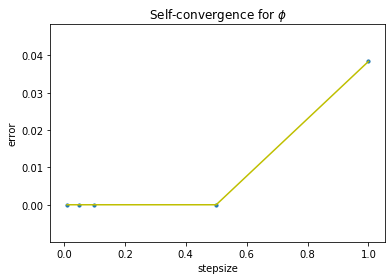

RMSE: 1.0675472057331494e-17
SI: 1.390461295263449e-15
R2: 1.0


In [3]:
#difference formula for determining error
def difference(a,b):
    return np.abs(b[1]-a[1])
#conditions
tmax=20
y0 = np.array([a0, phi0, N0, eta0])
yf = []
#various refinement stepsizes
h1=1
h2=.5
h3=.1
h4=.05
h5=.01
stepsizes = np.array([h1, h2, h3, h4, h5])
#solving for each stepsize
for h in stepsizes:
    t, y = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
    yf.append(y[-1])
#iterating through solutions with different stepsizes and implementing difference formula
errors = []
i=0
while i <= 4:
    error_difference = difference(yf[i], yf[-1])
    errors.append(error_difference)
    i += 1
errors = np.asarray(errors)
print('errors for phi:', errors)

#polynomial regression to determine order    
stepsizes = stepsizes[:, np.newaxis]
errors = errors[:, np.newaxis]

#degree=4 corresponds to the order of self-convergence
polynomial_features= PolynomialFeatures(degree=4)
stepsizes_poly = polynomial_features.fit_transform(stepsizes)

model = LinearRegression()
model.fit(stepsizes_poly, errors)
errors_poly_pred = model.predict(stepsizes_poly)

#how well the model fits the data
average = np.mean(errors)
RMSE = np.sqrt(mean_squared_error(errors,errors_poly_pred))
R2 = r2_score(errors,errors_poly_pred)
SI = RMSE/average

plt.scatter(stepsizes, errors, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(stepsizes,errors_poly_pred), key=sort_axis)
stepsizes, errors_poly_pred = zip(*sorted_zip)
plt.plot(stepsizes, errors_poly_pred, color='y')
plt.xlabel('stepsize')
plt.ylabel('error')
plt.title(f"Self-convergence for $\phi$")
plt.show()
print('RMSE:',RMSE)
print('SI:',SI)
print('R2:',R2)

Order of self-convergence is 4 which is expected since an RK4 integrator was used

Question #4: Employ Richardson extrapolation to determine an error for the number of e-foldings for each case run.

In [4]:
#order of self-convergence as determined above through polynomial regression
p=4
#refinement ratio R = (medium grid stepsize)/(fine grid stepsize)
R=stepsizes[2]/stepsizes[4] 
def Richardsonphi(yf,R,p):
    #reference y (yr) formula using medium and fine grid values
    yr=(R**p*yf[4][1]-yf[2][1])/(R**p-1)
    #error
    e=(yr-yf[2][1])/yr
    return abs(e)
print('error of phi:',Richardsonphi(yf,R,p))

def RichardsonN(yf,R,p):
    yr=(R**p*yf[4][2]-yf[2][2])/(R**p-1)
    e=(yr-yf[2][2])/yr
    return abs(e)
print('error of final N using phi0:',RichardsonN(yf,R,p))

#error of N using phi02
tmax=13
y0 = np.array([a0, phi02, N0, eta0])
yf = []
for h in stepsizes:
    t, y = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
    yf.append(y[-1])
def RichardsonN(yf,R,p):
    yr=(R**p*yf[4][2]-yf[2][2])/(R**p-1)
    e=(yr-yf[2][2])/yr
    return abs(e)
print('error of final N using phi02:',RichardsonN(yf,R,p))

#error of N using phi03
tmax=25
y0 = np.array([a0, phi03, N0, eta0])
yf = []
for h in stepsizes:
    t, y = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
    yf.append(y[-1])
def RichardsonN(yf,R,p):
    yr=(R**p*yf[4][2]-yf[2][2])/(R**p-1)
    e=(yr-yf[2][2])/yr
    return abs(e)
print('error of final N using phi03:',RichardsonN(yf,R,p))

#error of N using phi0
tmax=30
y0 = np.array([a0, phi04, N0, eta0])
yf = []
for h in stepsizes:
    t, y = odeSolve(t0, y0, tmax, h, slowroll, RK4, m)
    yf.append(y[-1])
def RichardsonN(yf,R,p):
    yr=(R**p*yf[4][2]-yf[2][2])/(R**p-1)
    e=(yr-yf[2][2])/yr
    return abs(e)
print('error of final N using phi04:',RichardsonN(yf,R,p))

error of phi: [1.03782823e-15]
error of final N using phi0: [3.14590357e-07]
error of final N using phi02: [1.5285426e-05]
error of final N using phi03: [1.81784247e-06]
error of final N using phi04: [8.62444654e-07]
